## Importing Libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data

In [9]:
df = pd.read_csv(r"C:\Users\user\Desktop\SuperStore AnalysisPY\Data Superstore.csv", encoding='latin1')

In [11]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Checking Null Values

In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Checking Data Type

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## Changing Order Date to datetime Type

In [15]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [27]:
# Creating Column for future analysis
df["Year-Month"] = df["Order Date"].dt.to_period("M")

## Analyzing Monthly Sales and Max Sale Period 

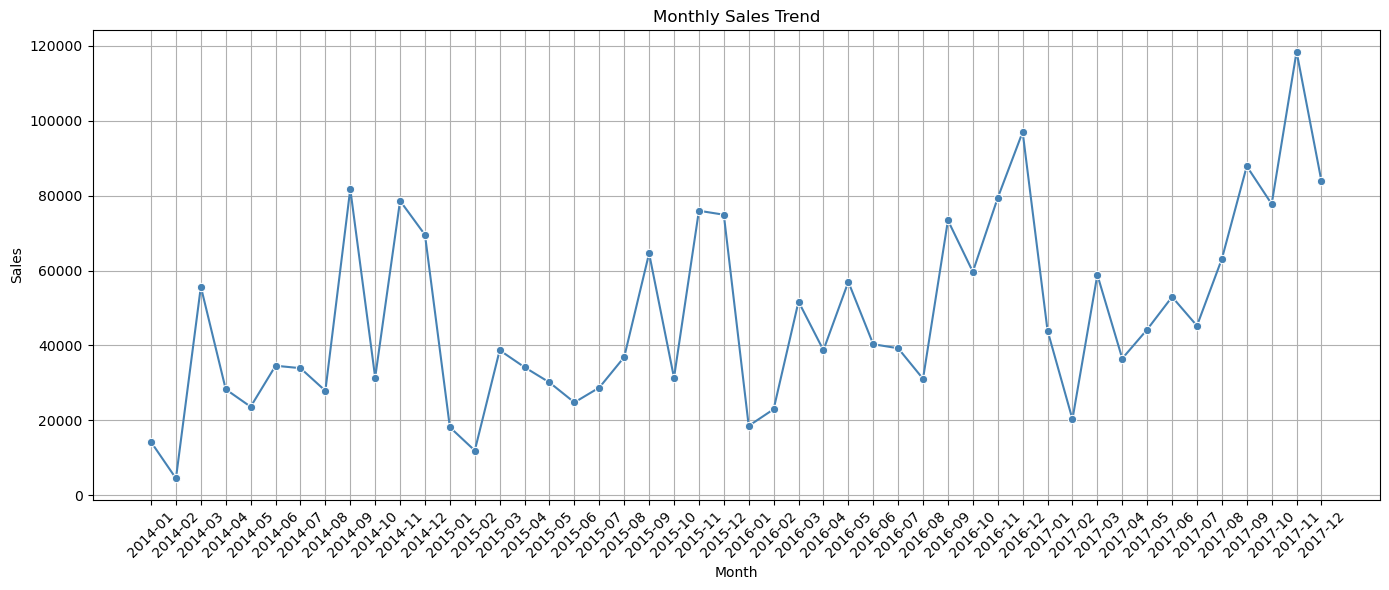

 Month with the highest sales: 2017-11 with sales of $118447.82 (5.16% of total sales)


In [30]:
monthly_sales = df.groupby("Year-Month")["Sales"].sum().reset_index()
monthly_sales["Year-Month"] = monthly_sales["Year-Month"].astype(str)

total_sales = monthly_sales["Sales"].sum()

max_sales_month = monthly_sales.loc[monthly_sales["Sales"].idxmax()]
percent_of_total = (max_sales_month["Sales"] / total_sales) * 100

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x="Year-Month", y="Sales", marker="o", color="steelblue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print(f" Month with the highest sales: {max_sales_month["Year-Month"]} "
      f"with sales of ${max_sales_month["Sales"]:.2f} "
      f"({percent_of_total:.2f}% of total sales)")

## State which generated most profit

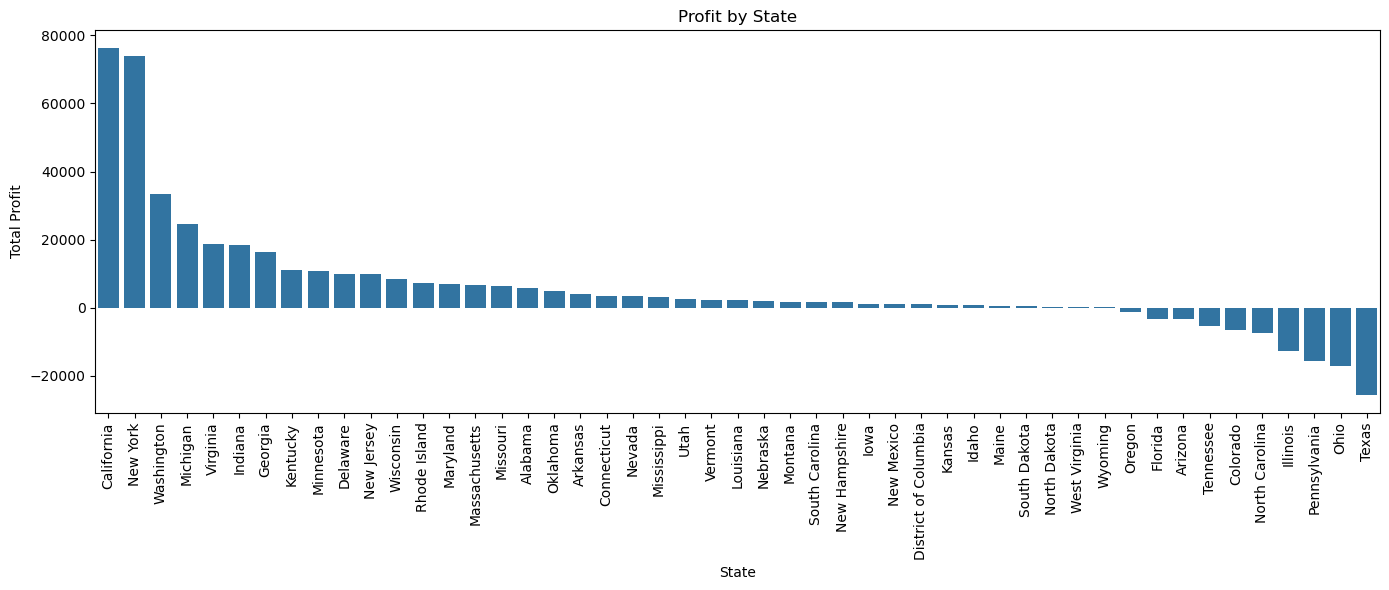

State with highest profit: California with $76381.39 (26.67% of total profit)


In [33]:
state_profit = df.groupby("State")["Profit"].sum().reset_index()

state_profit = state_profit.sort_values(by="Profit", ascending=False)

total_profit = state_profit["Profit"].sum()

top_state = state_profit.iloc[0]
percent_of_total = (top_state["Profit"] / total_profit) * 100

plt.figure(figsize=(14, 6))
sns.barplot(data=state_profit, x="State", y="Profit",)
plt.title("Profit by State")
plt.xticks(rotation=90)
plt.ylabel("Total Profit")
plt.xlabel("State")
plt.tight_layout()
plt.show()

print(f"State with highest profit: {top_state["State"]} with ${top_state["Profit"]:.2f} "
      f"({percent_of_total:.2f}% of total profit)")

 ## Category and Sub-Category Profit Analysis

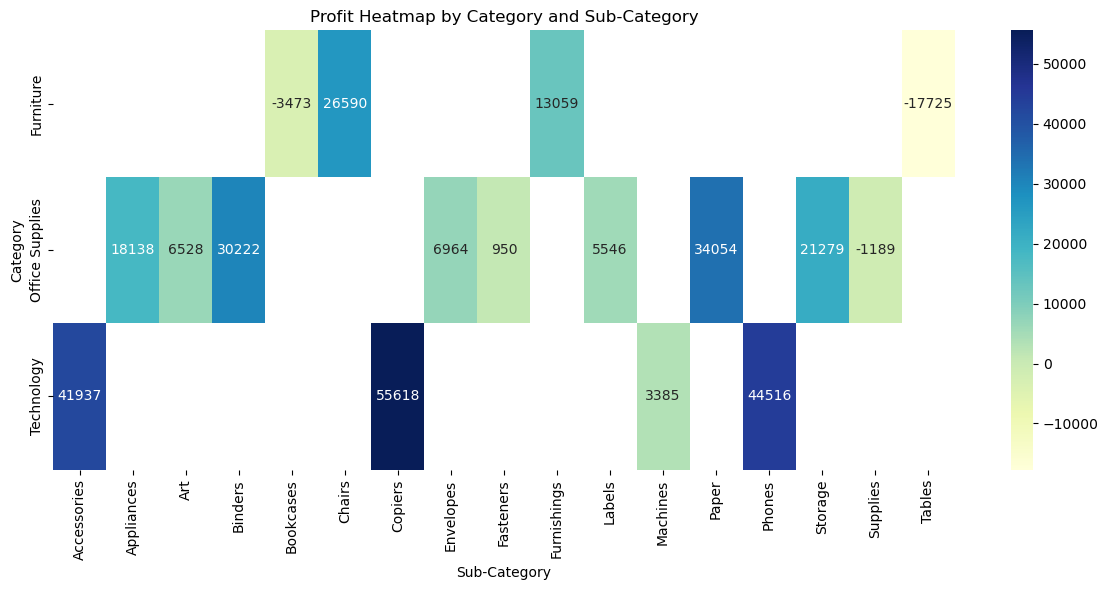

Top Category/Sub-Category: Technology > Copiers with profit of $55617.82 (19.42% of total profit)


In [38]:
cat_subcat_profit = df.groupby(["Category", "Sub-Category"])["Profit"].sum().reset_index()

total_profit = cat_subcat_profit["Profit"].sum()

top_combo = cat_subcat_profit.loc[cat_subcat_profit["Profit"].idxmax()]
percent_of_total = (top_combo["Profit"] / total_profit) * 100

pivot_table = cat_subcat_profit.pivot(index="Category", columns="Sub-Category", values="Profit")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Profit Heatmap by Category and Sub-Category")
plt.tight_layout()
plt.show()

print(f"Top Category/Sub-Category: {top_combo["Category"]} > {top_combo["Sub-Category"]} "
      f"with profit of ${top_combo["Profit"]:.2f} "
      f"({percent_of_total:.2f}% of total profit)")

## Sub-Category which is in Loss

In [39]:
subcat_profit = df.groupby("Sub-Category")["Profit"].sum().reset_index()

loss_subcats = subcat_profit[subcat_profit["Profit"] < 0]

max_loss_subcat = loss_subcats.loc[loss_subcats["Profit"].idxmin()]

total_loss = loss_subcats["Profit"].sum()

percent_of_total_loss = (max_loss_subcat["Profit"] / total_loss) * 100

print(f"Most loss-making sub-category: {max_loss_subcat['Sub-Category']} "f"with a loss of ${max_loss_subcat['Profit']:.2f} "f"({percent_of_total_loss:.2f}% of total losses)")

Most loss-making sub-category: Tables with a loss of $-17725.48 (79.18% of total losses)


## Customer Segment Analysis

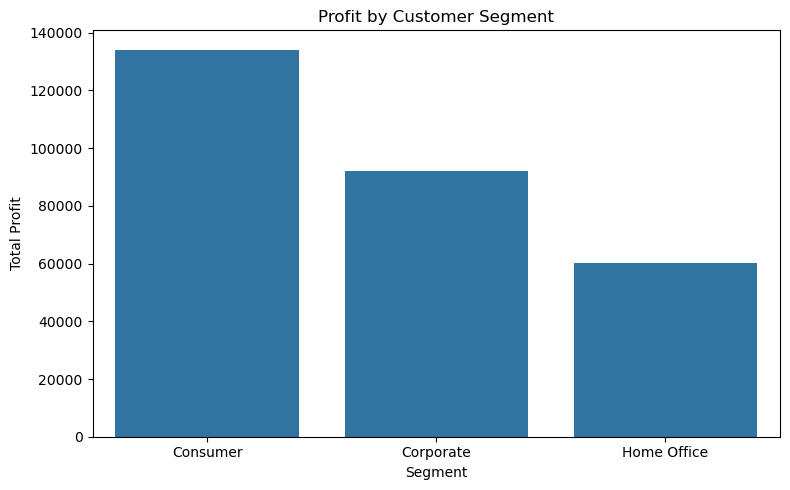

Most profitable customer segment: Consumer with profit of $134119.21 (46.83% of total profit)


In [42]:
segment_profit = df.groupby("Segment")["Profit"].sum().reset_index()

total_profit = segment_profit["Profit"].sum()

top_segment = segment_profit.loc[segment_profit["Profit"].idxmax()]
percent_of_total = (top_segment["Profit"] / total_profit) * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=segment_profit, x="Segment", y="Profit")
plt.title("Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

print(f"Most profitable customer segment: {top_segment['Segment']} "f"with profit of ${top_segment['Profit']:.2f} "f"({percent_of_total:.2f}% of total profit)")

## Regional Sales and Profit

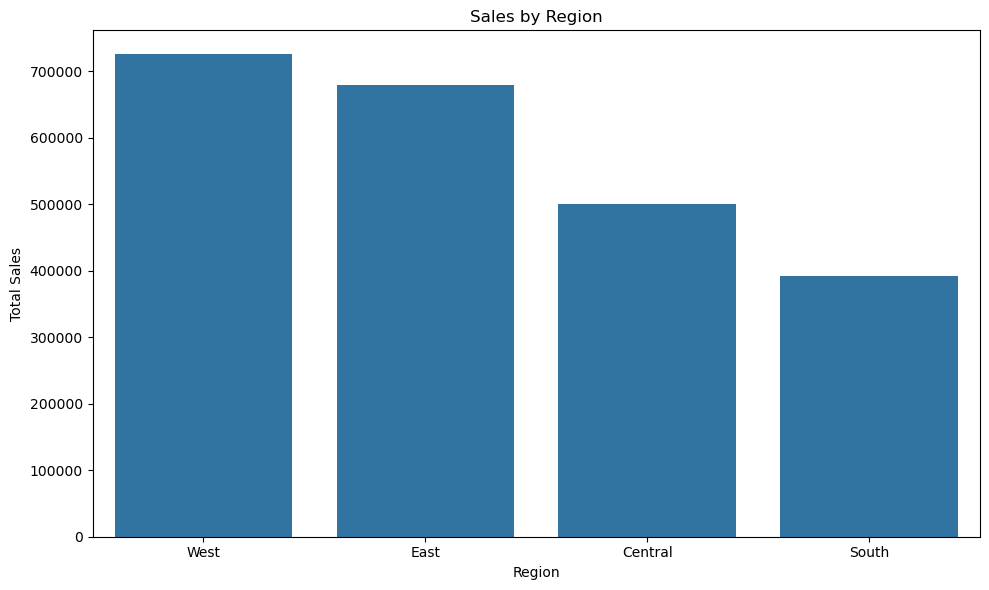

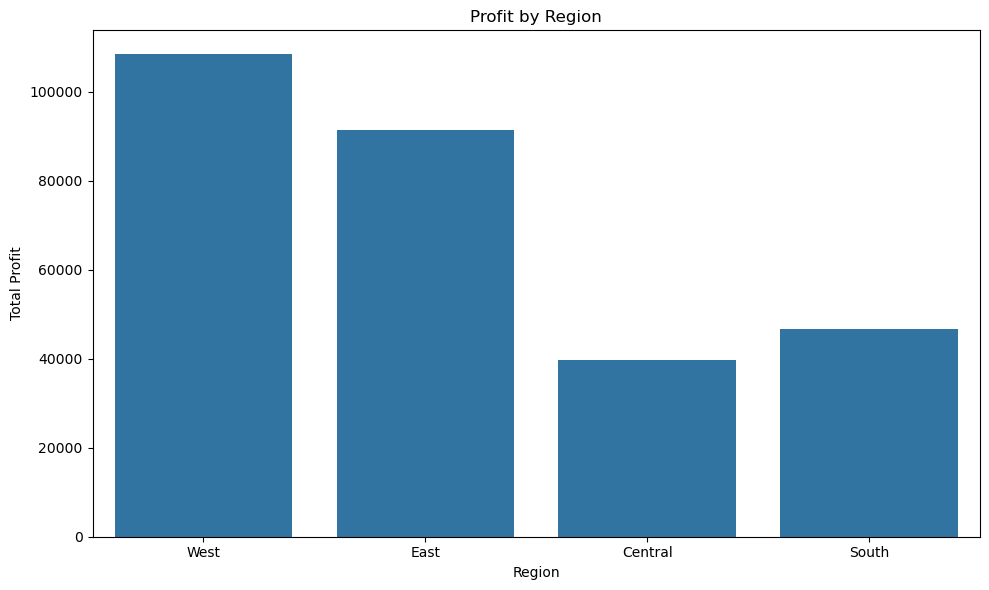

Regional Sales and Profit Overview:
    Region        Sales       Profit  % of Total Sales  % of Total Profit
3     West  725457.8245  108418.4489             31.58              37.86
1     East  678781.2400   91522.7800             29.55              31.96
0  Central  501239.8908   39706.3625             21.82              13.86
2    South  391721.9050   46749.4303             17.05              16.32


In [43]:
region_stats = df.groupby("Region").agg({"Sales": "sum","Profit": "sum"}).reset_index()

total_sales = region_stats["Sales"].sum()
total_profit = region_stats["Profit"].sum()

region_stats["% of Total Sales"] = (region_stats["Sales"] / total_sales * 100).round(2)
region_stats["% of Total Profit"] = (region_stats["Profit"] / total_profit * 100).round(2)

region_stats = region_stats.sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_stats, x="Region", y="Sales")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_stats, x="Region", y="Profit")
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

print("Regional Sales and Profit Overview:")
print(region_stats)